In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [201]:
min_max_Scalar = preprocessing.MinMaxScaler(feature_range=(0,1))

In [202]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [203]:
col = df.columns
Y = min_max_Scalar.fit_transform(df)
print (Y)

[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


In [204]:
df = pd.DataFrame(Y, columns = col)
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
Y=df.Glucose
X=df.drop('Glucose',axis=1)


In [207]:
X.head()

Pregnancies  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941       0.590164       0.353535  0.000000  0.500745   
1     0.058824       0.540984       0.292929  0.000000  0.396423   
2     0.470588       0.524590       0.000000  0.000000  0.347243   
3     0.058824       0.540984       0.232323  0.111111  0.418778   
4     0.000000       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0

In [208]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [209]:
X_train = X_train.values
Y_train = Y_train.values

In [210]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

In [211]:
X_test = X_test.T
Y_test = Y_test.values.reshape(1, X_test.shape[1])





In [212]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)


Shape of X_train :  (8, 614)
Shape of Y_train :  (1, 614)
Shape of X_test :  (8, 154)
Shape of Y_test :  (1, 154)


In [213]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
    

In [225]:
def Batch_Grediant(X, Y, learning_rate, iterations):
    
    m = X.shape[1]
    
    n = X.shape[0]
    
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [226]:
iterations = 100
learning_rate = 0.0001
W, B, cost_list = Batch_Grediant(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10 iteration is :  0.6931210104313265
cost after  20 iteration is :  0.6930948638869266
cost after  30 iteration is :  0.6930687409048616
cost after  40 iteration is :  0.6930426414632672
cost after  50 iteration is :  0.6930165655402986
cost after  60 iteration is :  0.6929905131141312
cost after  70 iteration is :  0.6929644841629594
cost after  80 iteration is :  0.6929384786649978
cost after  90 iteration is :  0.6929124965984805


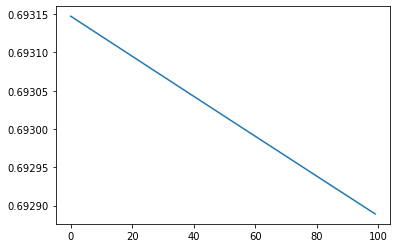

In [227]:
plt.plot(np.arange(iterations), cost_list)
plt.show()


In [217]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [218]:
accuracy(X_test, Y_test, W, B)


Accuracy of the model is :  61.66 %


In [219]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

3

In [220]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.001):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs): 
        epoch_list.append(i)   
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)


        
    return w, b, cost, cost_list, epoch_list




In [221]:
w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(X_train,Y_train.flatten(),20)


cost after  0 iteration is :  15951.81437057895


In [222]:
from numpy.ma.core import shape
shape(epoch_list)

(20,)

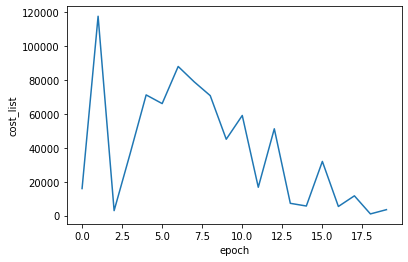

In [223]:
plt.xlabel("epoch")
plt.ylabel("cost_list")
plt.plot(epoch_list,cost_list)

In [224]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
#
# Pass instance of pipeline and training and test data set
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(pipeline, X_train, X_test, cv=8, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [nan nan nan nan nan nan nan nan]
Cross Validation accuracy: nan +/- nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/loc